# Non Normed

This experiment has the purpose of defining the number of clusters presented in the data. For that, we use the t-SNE for the projection of the data (dimensionality reduction), and an error metric to determine the best number of clusters. The metrics used are: square of the 2-norm distance metric, silhouette score and Davies-Bouldin Index.

Metrics such as adjusted rand index, mutual information based scores, homogeneity, completeness and V-measure can not be used in this work because they require the ground truth (true labels) of the data.

In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import reader as _reader
from src import visualization as _visualization
import numpy as np
import sklearn
from sklearn.cluster import KMeans

In [2]:
X = _reader.readBOW(normed=False)
print(X[:10])
print(X.shape)

['word2vec.csv', 'health.txt', 'bags.csv']
   0     1     2     3     4     5     6     7     8     9     ...   1193  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
6   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
7   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
8   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
9   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   

   1194  1195  1196  1197  1198  1199      1200  1201  1202  
0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000

In [3]:
best_K, Ks, Js = _optimizer.elbow_kmeans(X)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 0.9726475050152872
error = 0.9726475050152872
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 0.9310181118389227
error = 0.04162939317636449
###############################
Number of Clusters: 22
Starting K-means++
Finished
J = 0.9066177951240754
error = 0.024400316714847325
###############################
Number of Clusters: 32
Starting K-means++
Finished
J = 0.8854534195495292
error = 0.0211643755745462
###############################
Number of Clusters: 42
Starting K-means++
Finished
J = 0.8675803407768214
error = 0.017873078772707718
###############################
Number of Clusters: 52
Starting K-means++
Finished
J = 0.8546023804705785
error = 0.012977960306242986
###############################
Number of Clusters: 62
Starting K-means++
Finished
J = 0.8412456247655489
error = 0.013356755705029588
###############################
Number of Clusters: 72
Starti

J  [0.9726475050152872, 0.9310181118389227, 0.9066177951240754, 0.8854534195495292, 0.8675803407768214, 0.8546023804705785, 0.8412456247655489, 0.8305007266703414, 0.8403950457102104]
Ks  [2, 12, 22, 32, 42, 52, 62, 72, 82]


<module 'matplotlib.pyplot' from '/home/azaelmsousa/AzaEnv/lib/python3.5/site-packages/matplotlib/pyplot.py'>

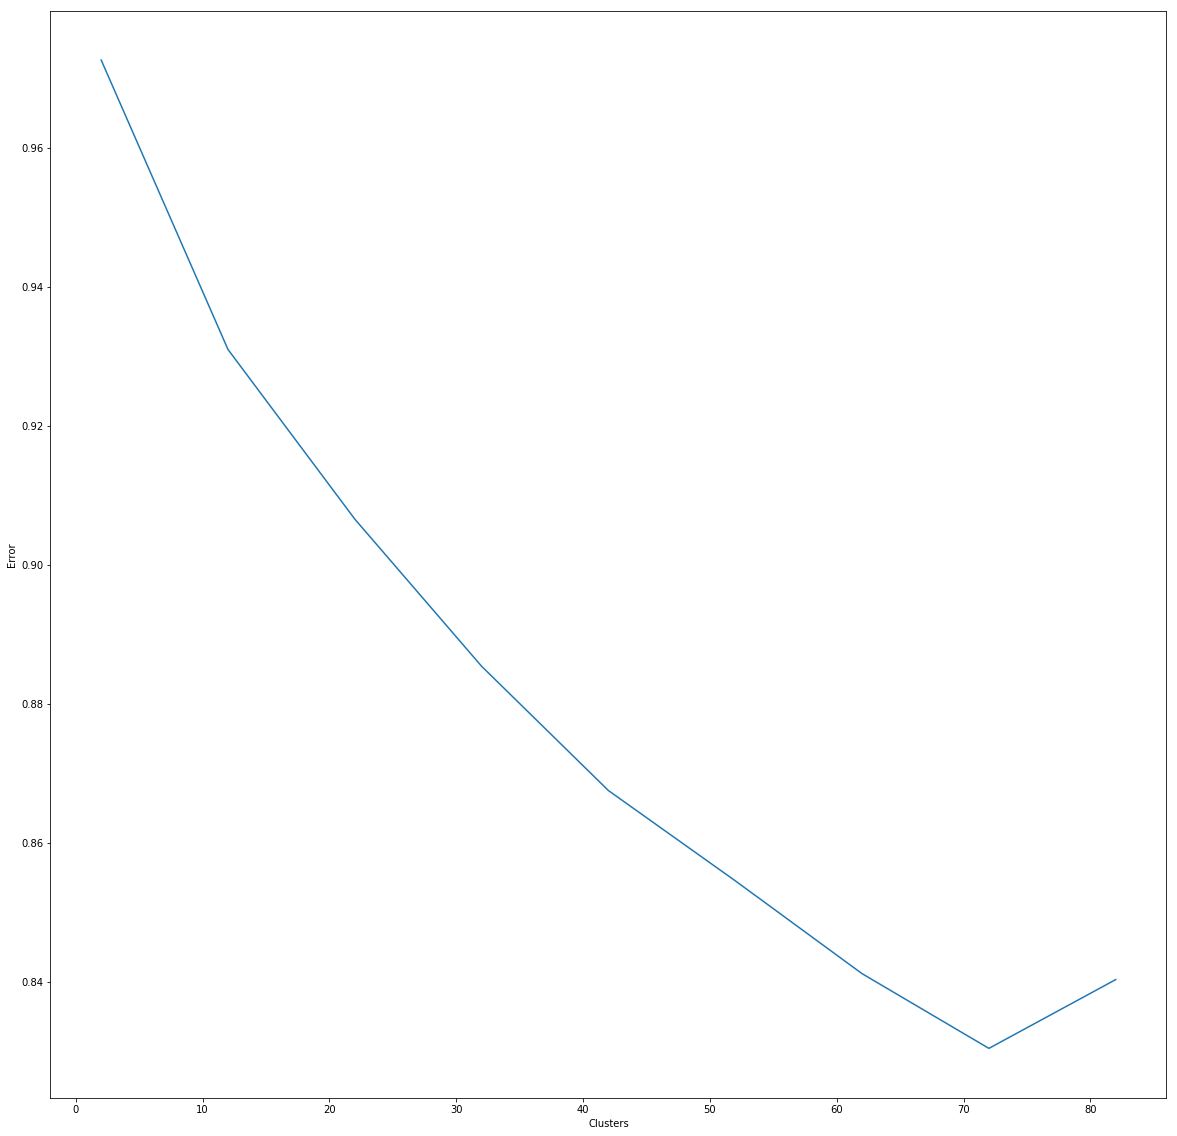

In [4]:
_visualization.plot_cluster_errors(Ks,Js)

## Refining the Search 
The error threshould was reach with 22 clusters, then we can refine our search while increasing the steps from 10 to 1. 


In [5]:
best_K, Ks, Js = _optimizer.elbow_kmeans(X, min_k=20, step=1)

###############################
Number of Clusters: 20
Starting K-means++
Finished
J = 0.9110055937143485
error = 0.9110055937143485
###############################
Number of Clusters: 21
Starting K-means++
Finished
J = 0.9072754214952319
error = 0.0037301722191166453
###############################

Best k: 21
Number of iterations: 3


J  [0.9110055937143485, 0.9072754214952319]
Ks  [20, 21]


<module 'matplotlib.pyplot' from '/home/azaelmsousa/AzaEnv/lib/python3.5/site-packages/matplotlib/pyplot.py'>

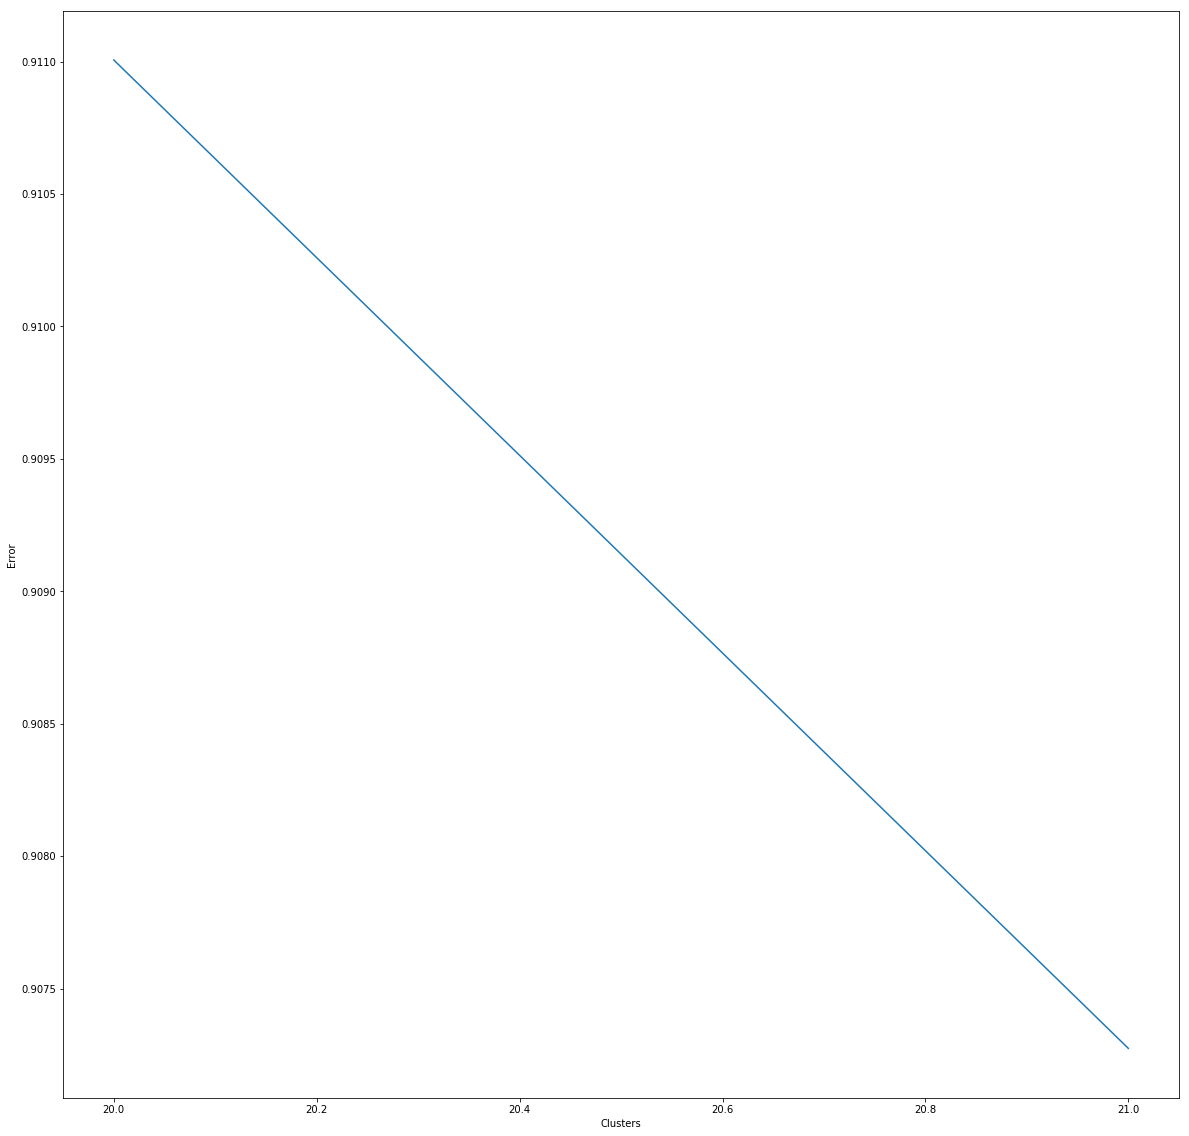

In [6]:
_visualization.plot_cluster_errors(Ks,Js)

For KMeans there was only a marginal Gain while increasing the clusters passing by this point. 
To make sure we made a bigger step otmizations to see where it will stop. 

In [ ]:
best_K, Ks, Js = _optimizer.elbow_kmeans(X, min_k=2, step=100)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 0.9726475050152872
error = 0.9726475050152872
###############################
Number of Clusters: 102
Starting K-means++
Finished
J = 0.8192944638098331
error = 0.15335304120545412
###############################
Number of Clusters: 202
Starting K-means++


In [ ]:
_visualization.plot_cluster_errors(Ks,Js)